<a href="https://colab.research.google.com/github/DuplamenteH/Machine-Learning/blob/master/Projeto1_NS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregando dados e ajustando os DataFrames

In [1]:
import pandas as pd 
uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
renomear = {
    'movieId': 'filmesId',
    'title'  : 'titulo',
    'genres' : 'genero'
}

filmes = filmes.rename(columns=renomear)
filmes.head()

,filmesId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos = filmes.genero.str.get_dummies(sep='|')

In [4]:
generos.head()


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
dados_filmes = pd.concat([filmes,generos],axis=1)
dados_filmes.head()

,filmesId,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Escalonando dados

In [0]:
from sklearn.preprocessing import  StandardScaler 
scaler = StandardScaler()

In [7]:
generos_Escalados = scaler.fit_transform(generos)

generos_Escalados.shape

(9742, 20)

#Agrupando os dados

In [0]:
from sklearn.cluster import KMeans as KM
modelo = KM(n_clusters=3) 

In [11]:
modelo.fit(generos_Escalados)
print('Grupos {}'.format(modelo.labels_))

Grupos [2 2 1 ... 1 2 1]


In [12]:
print(generos.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [13]:
print(modelo.cluster_centers_)

[[-0.05917995  0.38923206 -0.24465216 -0.21480179 -0.26395699 -0.22384617
   2.58210642 -0.19778644  0.17933673 -0.2405031   0.66183827 -0.17067194
  -0.05713349 -0.15693762  0.35172016 -0.25248767 -0.25009664  0.72046878
  -0.15985906 -0.06271605]
 [ 0.01725265 -0.06090949 -0.07534614 -0.25813236 -0.27045122  0.01030084
  -0.37463158  0.05829722  0.04569219 -0.0753501  -0.09492563  0.06165372
  -0.03393781 -0.02230084 -0.04263183  0.0738788   0.0225703  -0.0587842
   0.04728315  0.0211378 ]
 [-0.05917995 -0.01658269  0.88771836  2.26159692  2.41818733  0.20045116
  -0.33724464 -0.20270311 -0.57707848  0.88255948 -0.09492563 -0.26253113
   0.33348007  0.36846778 -0.11077803 -0.25458325  0.13855713 -0.44729134
  -0.16510649 -0.0847527 ]]


In [16]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.389232,-0.244652,-0.214802,-0.263957,-0.223846,2.582106,-0.197786,0.179337,-0.240503,0.661838,-0.170672,-0.057133,-0.156938,0.351720,-0.252488,-0.250097,0.720469,-0.159859,-0.062716
1,0.017253,-0.060909,-0.075346,-0.258132,-0.270451,0.010301,-0.374632,0.058297,0.045692,-0.075350,-0.094926,0.061654,-0.033938,-0.022301,-0.042632,0.073879,0.022570,-0.058784,0.047283,0.021138
2,-0.059180,-0.016583,0.887718,2.261597,2.418187,0.200451,-0.337245,-0.202703,-0.577078,0.882559,-0.094926,-0.262531,0.333480,0.368468,-0.110778,-0.254583,0.138557,-0.447291,-0.165106,-0.084753


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ebd868e80>,
      dtype=object)

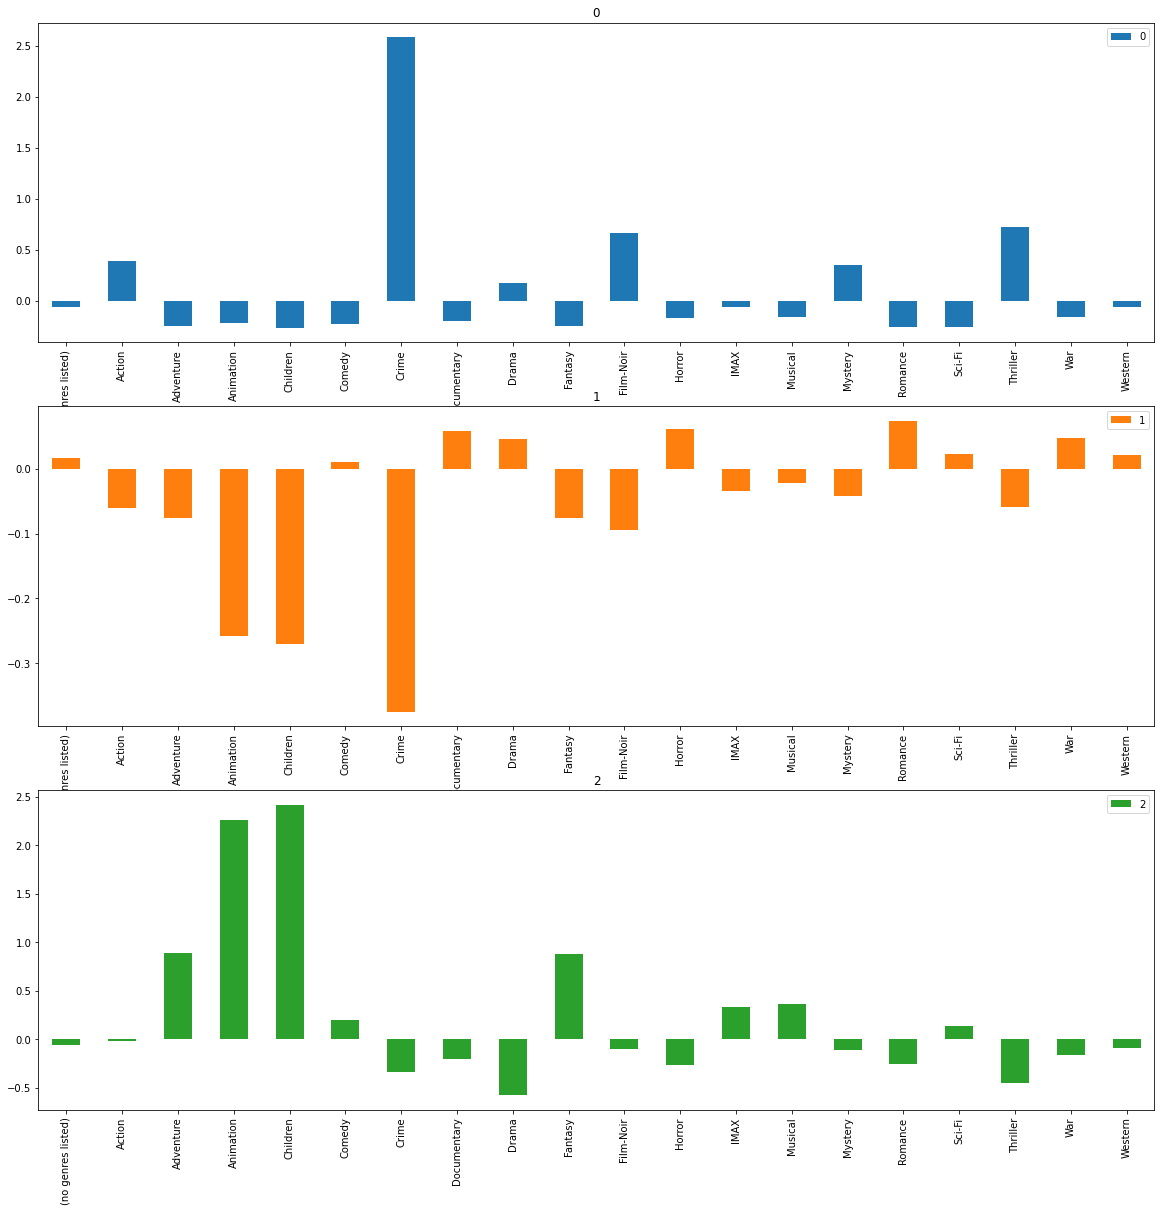

In [19]:
grupos.transpose().plot.bar(subplots=True,
                            figsize=(20,20),
                            sharex=False)

In [21]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filmesId,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5269,8665,"Bourne Supremacy, The (2004)",Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4178,6021,"American Friend, The (Amerikanische Freund, De...",Crime|Drama|Mystery|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
7092,70301,Obsessed (2009),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
8368,109295,Cold Comes the Night (2013),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
893,1190,Tie Me Up! Tie Me Down! (¡Átame!) (1990),Crime|Drama|Romance,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
9618,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
307,349,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1483,2008,"This World, Then the Fireworks (1997)",Crime|Drama|Film-Noir,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
7783,91842,Contraband (2012),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2459,3272,Bad Lieutenant (1992),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
